# Trabalho de casa 01: Método dos vizinhos mais próximos ($k$-NN)

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

In [238]:
from dataclasses import dataclass
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial
from collections import Counter
from sklearn.cluster import KMeans
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))


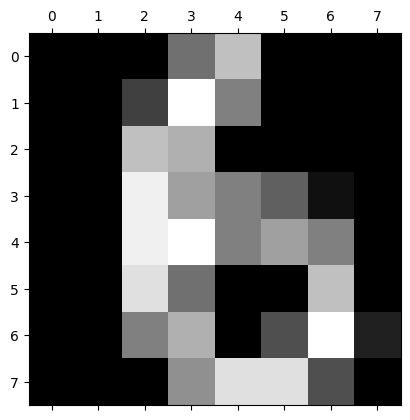

In [130]:
# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [131]:
# show the shape of the dataset: train and test.
print('feature train: ' +  str(mnist.features_train.shape))
print('feature test: ' +   str(mnist.features_test.shape))
print('labels train:  '  + str(mnist.labels_train.shape))
print('labels test:  '  +  str(mnist.labels_test.shape))

feature train: (1347, 64)
feature test: (450, 64)
labels train:  (1347,)
labels test:  (450,)


### K-NN algorithm

In [132]:

# L2 square distance between two vectorized images x and y
def distance1(x,y):
    return np.sum(np.square(x-y))
# L2 distance between two vectorized images x and y
def distance2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
# and can be coded as below
def distance3(x,y):
    return np.linalg.norm(x-y)

def kNN(x, k, data, label):
    #create a list of distances between the given image and the images of the training set
#     distances =[np.linalg.norm(x-data[i]) for i in range(len(data))]
    distances =[distance1(x,data[i]) for i in range(len(data))]
    #Use "np.argpartition". It does not sort the entire array. 
    #It only guarantees that the kth element is in sorted position 
    # and all smaller elements will be moved before it. 
    # Thus the first k elements will be the k-smallest elements.
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

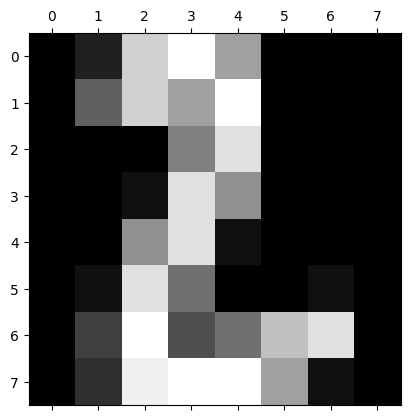

In [133]:
# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[4].reshape(8, 8))
plt.gray()
plt.show()

In [134]:
i=4
print('The predicted value is : ', 
      kNN(mnist.features_test[i], 2, mnist.features_train, mnist.labels_train), 
      ' and the true value is ', 
      mnist.labels_test[i])

The predicted value is :  2  and the true value is  2


In [135]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [136]:
kstart = 1
kend = 20
k_acc = [accuracy_set(mnist.features_test, mnist.labels_test, mnist.features_train, mnist.labels_train, k) for k in range(kstart,kend)]
k_acc

[0.9822222222222222,
 0.9844444444444445,
 0.9866666666666667,
 0.9866666666666667,
 0.9933333333333333,
 0.9955555555555555,
 0.9933333333333333,
 0.9888888888888889,
 0.9866666666666667,
 0.9866666666666667,
 0.98,
 0.98,
 0.98,
 0.9822222222222222,
 0.98,
 0.9777777777777777,
 0.98,
 0.9777777777777777,
 0.9777777777777777]

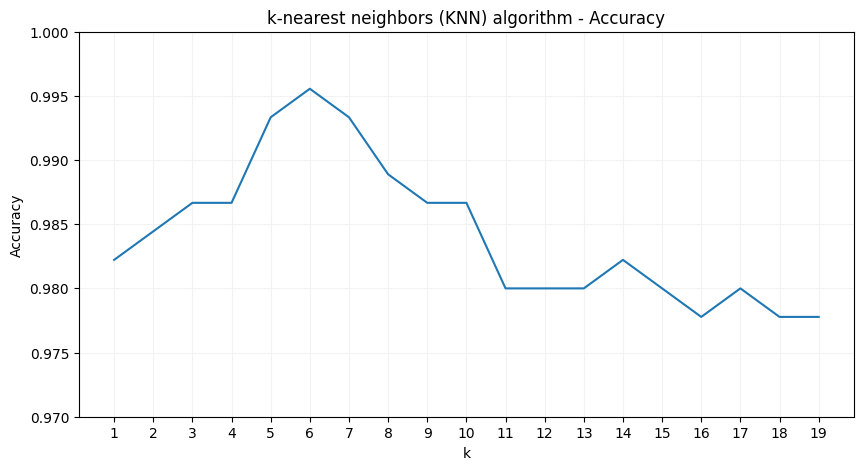

In [137]:
X = [k for k in range(kstart,kend)]
plt.figure(figsize = (10,5))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.97,1)
plt.xticks(range(kstart,kend))
plt.plot(X,k_acc)
plt.title('k-nearest neighbors (KNN) algorithm - Accuracy')
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')

In [138]:
def check_image(data, label, train_data, train_label, k):
    i = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            print(f'#{i} ->The predicted value is : ', lab,' and the true value is ', mnist.labels_test[i])
            i += 1
            
for k in range(1,2):
    check_image(mnist.features_test, mnist.labels_test, mnist.features_train, mnist.labels_train, k)

#0 ->The predicted value is :  6  and the true value is  6
#1 ->The predicted value is :  9  and the true value is  9
#2 ->The predicted value is :  3  and the true value is  3
#3 ->The predicted value is :  7  and the true value is  7
#4 ->The predicted value is :  2  and the true value is  2
#5 ->The predicted value is :  1  and the true value is  1
#6 ->The predicted value is :  5  and the true value is  5
#7 ->The predicted value is :  2  and the true value is  2
#8 ->The predicted value is :  5  and the true value is  5
#9 ->The predicted value is :  2  and the true value is  2
#10 ->The predicted value is :  1  and the true value is  1
#11 ->The predicted value is :  9  and the true value is  9
#12 ->The predicted value is :  4  and the true value is  4
#13 ->The predicted value is :  0  and the true value is  0
#14 ->The predicted value is :  4  and the true value is  4
#15 ->The predicted value is :  2  and the true value is  2
#16 ->The predicted value is :  3  and the true va

In [139]:
# the cases that are classified wrong
def check_image(data, label, train_data, train_label, k):
    i = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) != lab:
            print(f'#{i} ->The predicted value is : ', lab,' and the true value is ', mnist.labels_test[i])
            i += 1
            
for k in range(1,2):
    check_image(mnist.features_test, mnist.labels_test, mnist.features_train, mnist.labels_train, k)

#0 ->The predicted value is :  9  and the true value is  6
#1 ->The predicted value is :  8  and the true value is  9
#2 ->The predicted value is :  7  and the true value is  3
#3 ->The predicted value is :  9  and the true value is  7
#4 ->The predicted value is :  8  and the true value is  2
#5 ->The predicted value is :  4  and the true value is  1
#6 ->The predicted value is :  9  and the true value is  5
#7 ->The predicted value is :  3  and the true value is  2


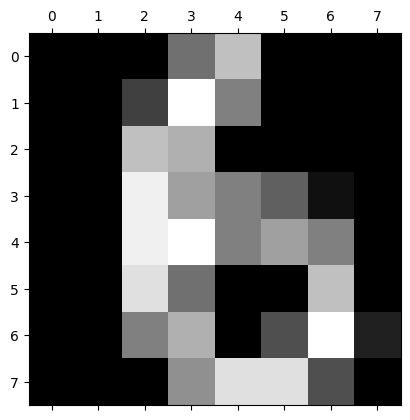

In [140]:
# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [141]:
mnist.features_train[0]

array([ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
        3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
        0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
       15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.])

In [142]:
mnist.features_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [143]:
mnist.features_train[0] - mnist.features_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Image: 6 feature test:

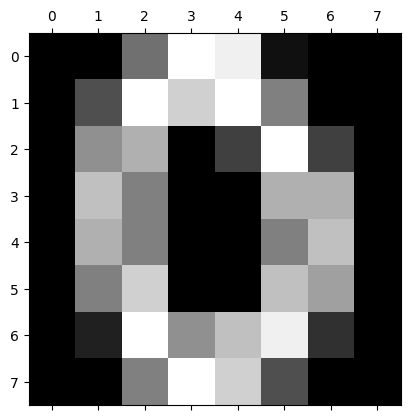

In [144]:
# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[439].reshape(8, 8))
plt.gray()
plt.show()

In [145]:
mnist.features_train[439]

array([ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
       11.,  0.,  0.,  0.,  0.,  0., 12., 16., 11.,  0.,  0.,  0.,  7.,
       12., 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  4.,  0.,
        0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
       16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  5.,  0.,  0.])

In [146]:
mnist.features_test[439]

array([ 0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 13., 16.,
        8.,  0.,  0.,  0.,  9., 11.,  0.,  4., 16.,  4.,  0.,  0., 12.,
        8.,  0.,  0., 11., 11.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,
        0.,  0.,  8., 13.,  0.,  0., 12., 10.,  0.,  0.,  2., 16.,  9.,
       12., 15.,  3.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.])

In [147]:
mnist.features_train[439] - mnist.features_test[439]

array([  0.,   0.,  -7., -15.,   1.,   4.,   0.,   0.,   0.,  -5., -16.,
        -8.,   0.,   3.,   0.,   0.,   0.,  -9., -11.,  12.,  12.,  -5.,
        -4.,   0.,   0.,  -5.,   4.,  16.,  16.,  -4., -11.,   0.,   0.,
        -7.,   0.,  12.,  16.,  -4., -12.,   0.,   0.,  -8., -13.,   9.,
        16., -10., -10.,   0.,   0.,  -2., -16.,   1.,   4., -13.,  -3.,
         0.,   0.,   0.,  -8., -13.,   0.,   0.,   0.,   0.])

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

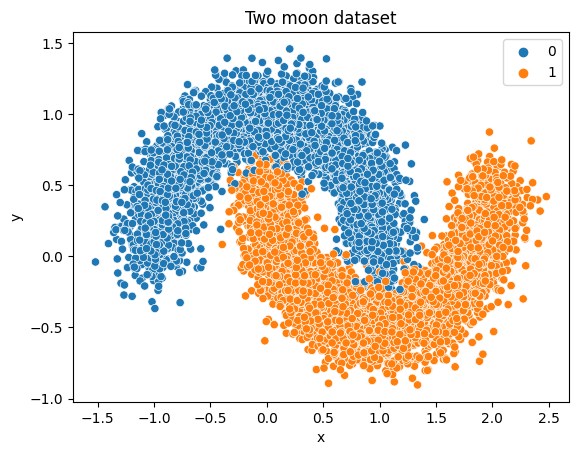

In [221]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=10000, shuffle=True, noise=0.15, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
X = moon.features_train
y = moon.labels_train

plt.xlabel("x")
plt.ylabel("y")
plt.title('Two moon dataset')
plt.show()


In [222]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(moon.features_train)

In [223]:
kmeans = KMeans(init="random",
                n_clusters=2,
                n_init=10,
                max_iter=500,
                random_state=42)

kmeans.fit(scaled_features)


KMeans(init='random', max_iter=500, n_clusters=2, n_init=10, random_state=42)

# Com Sklearn

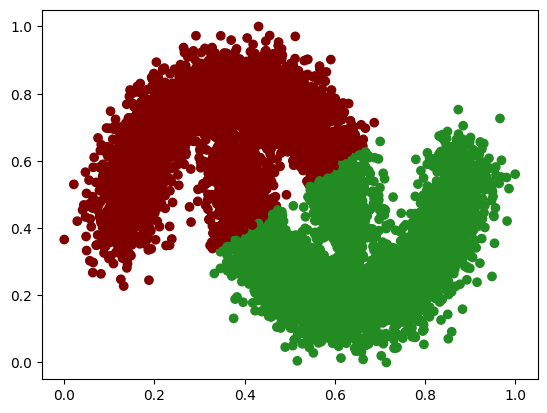

In [224]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=vectorizer(kmeans.labels_))

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [226]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [227]:
clf = KNN(2)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [228]:
clf.score(X_test, y_test)

0.988

# Sem Sklearn

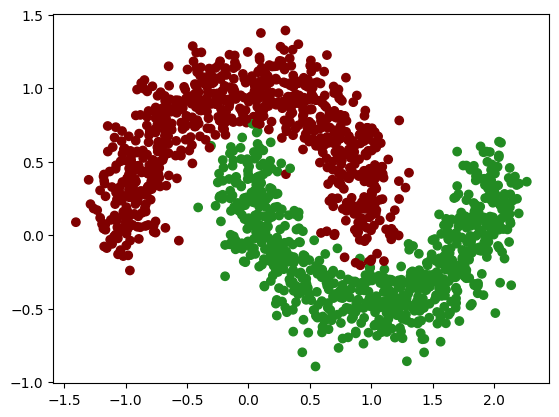

In [229]:
plt.scatter(X_test[:,0], X_test[:,1], c=vectorizer(prediction))

# Exercícios de "papel e caneta"

**Exercício 1.** Como mencionado na nota de aula, é comum *normalizar* os dados antes de utilizar algoritmos de ML. Seja $\mathbf{x} \in \mathcal{X}$ um ponto arbirtrário do nosso conjunto de dados (antes de normalização). Deixe também que $\mathcal{V}_k(\mathbf{x})$ seja o conjunto dos $k$ vizinhos mais próximos de $\mathbf{x}$ dentre nossas observações. É possível que $\mathcal{V}_k(\mathbf{x})$ mude caso normalizemos os dados? Prove.

*Solução aqui ou em PDF anexo*

In [230]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,random_state=0, shuffle=False)

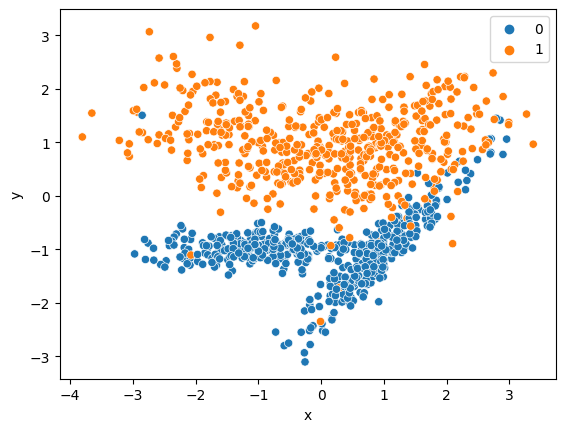

In [231]:
# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Exercício 2.** Suponha que estamos usando $k$-NN equipado com distância Mahalanobis $d_M$ (veja Eq. 3.5 das notas de aula). Suponha ainda que $\Sigma$ é a matrix de covariância real dos dados (i.e., do vetor aleatório $\mathbf{x} \sim \mathbb{P}_\mathbf{x}$), ao invés de uma estimativa baseada em amostras. Existe uma transformação $g$ tal que $d_M(a, b) = \|g(a) - g(b) \|_2$? Mostre a transformação e derive a matriz de covariância de $z = g(\mathbf{x})$. 

*Solução aqui ou em PDF anexo*

In [235]:
# Not normalized
heightsnorm = np.array([1.65,1.72,1.6,1.8])
weightsnorm = np.array([70,75,62,85])

# Normalized
heightnorm = np.array([-0.56,0.54,-1.65,1.66])
weightnorm = np.array([-0.51,0.17,-1.26,1.6])

In [236]:
heightsnorm

array([1.65, 1.72, 1.6 , 1.8 ])

In [246]:
df_snorm = pd.DataFrame({'height':heightsnorm, 'weight':weightsnorm})
df_snorm

,height,weight
0,1.65,70
1,1.72,75
2,1.60,62
3,1.80,85


In [247]:
df_norm = pd.DataFrame({'height':heightnorm, 'weight':weightnorm})
df_norm

,height,weight
0,-0.56,-0.51
1,0.54,0.17
2,-1.65,-1.26
3,1.66,1.60


In [252]:
languages = ['A', 'B', 'C', 'D']

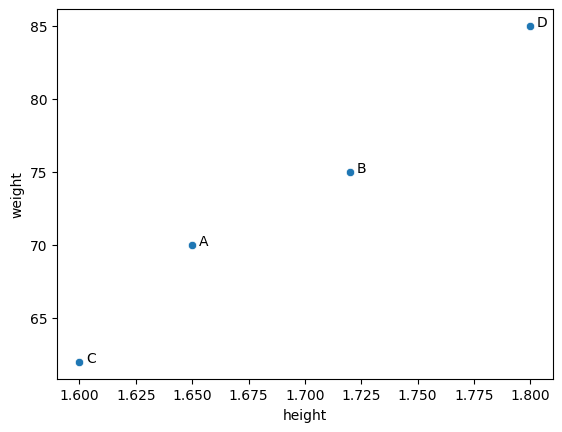

In [260]:
sns.scatterplot(data=df_snorm, x="height", y="weight")
for i, language in enumerate (languages):
    plt.text(heightsnorm[i]+0.003, weightsnorm[i] + 0.003, language)

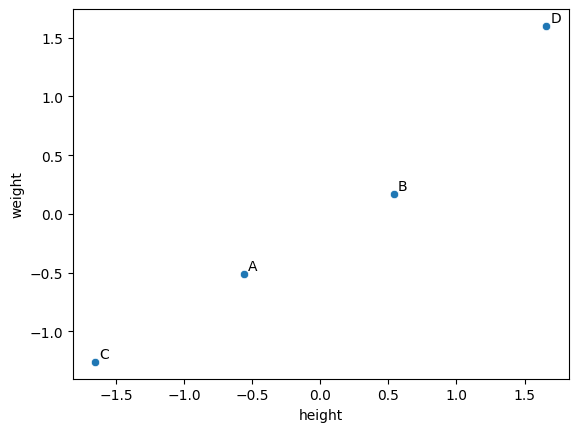

In [270]:
sns.scatterplot(data=df_norm, x="height", y="weight")
for i, language in enumerate (languages):
    plt.text(heightnorm[i]+0.03, weightnorm[i] + 0.03, language)